In [4]:
# This file is adapted from the original file kmeanas basics.py to run k means with eight cohorts. 

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np

In [2]:
# read the data

path = '/Users/zhongyuli/Desktop/python/cluster analysis/dataset/data_array.csv'

data_8c = pd.read_csv(path) 
data_8c[:5]




,study_id,bmi,hba1c,ldlc,hdlc,tgl,sbp,dbp,ratio_th,dmagediag,glucosef2,insulinf2,study
0,4,29.16903,6.6,98.0,46.0,62,171.5087,75.8778,1.347826,67.0,6.8820,60.0,jhs
1,11,25.71101,5.9,121.0,58.0,89,129.3313,66.7467,1.534483,79.0,5.7165,48.0,jhs
2,15,27.47169,5.6,139.0,45.0,150,144.9186,78.3681,3.333333,57.0,6.4380,150.0,jhs
3,20,39.32834,8.1,89.0,53.0,74,118.3285,70.0671,1.396226,58.0,8.8800,198.0,jhs
4,21,43.20700,8.7,101.0,42.0,148,159.5890,85.8390,3.523810,42.0,10.7670,300.0,jhs


In [5]:
# preprocessing - standardize the data
study_id = data_8c['study_id']
study = data_8c['study']
data_to_scale = data_8c.drop('study_id', axis=1)
data_to_scale = data_to_scale.drop('study', axis=1)

scaler = StandardScaler() 
scaled_data = scaler.fit_transform(data_to_scale)

# Convert scaled data back to a DataFrame and add the study_id column back
scaled_data_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)
scaled_data_df['study_id'] = study_id
scaled_data_df['study'] = study

scaled_data_df[:5]

,bmi,hba1c,ldlc,hdlc,tgl,sbp,dbp,ratio_th,dmagediag,glucosef2,insulinf2,study_id,study
0,-0.620303,0.041182,-0.330634,-0.028720,-0.983820,2.435907,0.135272,-0.724046,0.419451,-0.033027,-0.710433,4,jhs
1,-1.122319,-0.607751,0.332957,0.898128,-0.706631,0.153965,-0.508268,-0.671362,1.432024,-0.770653,-0.781691,11,jhs
2,-0.866713,-0.885865,0.852288,-0.105957,-0.080388,0.997291,0.310783,-0.163635,-0.424360,-0.314027,-0.175998,15,jhs
3,0.854567,1.431753,-0.590300,0.511941,-0.860625,-0.441324,-0.274253,-0.710385,-0.339979,1.231476,0.109034,20,jhs
4,1.417648,1.987981,-0.244079,-0.337669,-0.100921,1.791010,0.837316,-0.109873,-1.690077,2.425729,0.714728,21,jhs


In [6]:
kmeans = KMeans(
    init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42
)

# "init" controls the initialization technique. The standard version of the k-means algorithm is implemented by setting init to "random". 
# Setting this to "k-means++" employs an advanced trick to speed up convergence

#"n_clusters" sets k for the clustering step. This is the most important parameter for k-means.

# "n_init" sets the number of initializations to perform. This is important because two runs can converge on different cluster assignments. 
#The default behavior for the scikit-learn algorithm is to perform ten k-means runs and return the results of the one with the lowest SSE.

In [7]:
# select variables to cluster
var_selected = ['bmi', 'hba1c', 'ldlc', 'hdlc', 'tgl', 'sbp', 'dbp', 'dmagediag','ratio_th']

kmeans.fit(scaled_data_df[var_selected])

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [8]:
# The lowest SSE value
kmeans.inertia_

34030.60691150265

In [9]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 0.06068518,  0.53026362, -0.27344823, -0.96722255,  1.92863571,
         0.0790896 ,  0.14237035, -0.3203028 ,  1.91082092],
       [-0.53776167, -0.33723904, -0.35548335,  0.36843107, -0.35464057,
         0.01714762, -0.49474228,  0.8167598 , -0.35759448],
       [ 0.49275296,  0.17896038,  0.40858177, -0.09301671, -0.17405933,
        -0.03712109,  0.43046822, -0.68812162, -0.16655748]])

In [10]:
# The number of iterations required to converge
kmeans.n_iter_

25

In [11]:
kmeans.labels_[:5]

array([1, 1, 2, 2, 2], dtype=int32)

In [13]:
# HOW to choose the number of clusters
# 1) The elbow method: 

kmeans_kwargs = { # set the parameters for the kmeans algorithm
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = [] #initiate an empty list to store the sum of squared errors 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data_df[var_selected])
    sse.append(kmeans.inertia_)

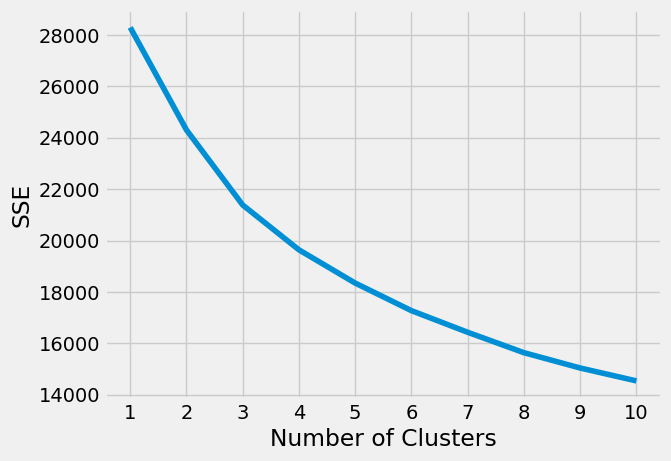

In [15]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [14]:
# Determining the elbow point in the SSE curve isn’t always straightforward. 
# If you’re having trouble choosing the elbow point of the curve, then you could use a Python package:
# kneed, to identify the elbow point programmatically:

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow # returns the elbow point

3

In [15]:
kmeans2 = KMeans(
    init="random", n_clusters=4, n_init=10, max_iter=300, random_state=42
)

In [16]:
kmeans2.fit(scaled_data_df[var_selected])
cluster_labels = kmeans2.labels_


In [17]:

# Adding cluster labels to the scaled DataFrame
scaled_data_df['cluster'] = cluster_labels
scaled_data_df[:10]





,bmi,hba1c,ldlc,hdlc,tgl,sbp,dbp,ratio_th,dmagediag,glucosef2,insulinf2,study_id,study,cluster
0,-0.620303,0.041182,-0.330634,-0.028720,-0.983820,2.435907,0.135272,-0.724046,0.419451,-0.033027,-0.710433,4,jhs,3
1,-1.122319,-0.607751,0.332957,0.898128,-0.706631,0.153965,-0.508268,-0.671362,1.432024,-0.770653,-0.781691,11,jhs,3
2,-0.866713,-0.885865,0.852288,-0.105957,-0.080388,0.997291,0.310783,-0.163635,-0.424360,-0.314027,-0.175998,15,jhs,3
3,0.854567,1.431753,-0.590300,0.511941,-0.860625,-0.441324,-0.274253,-0.710385,-0.339979,1.231476,0.109034,20,jhs,2
4,1.417648,1.987981,-0.244079,-0.337669,-0.100921,1.791010,0.837316,-0.109873,-1.690077,2.425729,0.714728,21,jhs,2
5,0.596695,-0.329637,-0.128672,-0.414907,0.884641,0.352395,0.486294,0.575265,-0.761885,0.002098,-0.211627,23,jhs,2
6,-0.667352,-1.812912,1.025399,-0.569381,0.155736,0.898076,0.076768,0.147565,0.081926,-0.208652,0.643470,31,jhs,3
7,2.263326,-0.793160,0.188698,1.824975,-0.696365,0.203572,0.310783,-0.741577,0.588213,-1.473155,-0.603546,37,jhs,3
8,1.478014,4.491008,-0.070968,-0.569381,-0.665566,-0.441324,0.544797,-0.431411,-0.846266,3.760482,0.500954,38,jhs,2
9,2.667208,3.285847,1.140806,-0.337669,-0.121454,-0.094072,0.661805,-0.123314,-2.618269,0.985601,-0.211627,39,jhs,2


In [19]:
# Visualizing the clusters
cluster_summary = scaled_data_df.groupby('cluster').describe()
print(cluster_summary)
# make a table of the cluster summary
cluster_summary.to_csv('/Users/zhongyuli/Desktop/python/cluster analysis/dataset/cluster_summary.csv')




            bmi                                                              \
          count      mean       std       min       25%       50%       75%   
cluster                                                                       
0        1489.0 -0.388233  0.722026 -2.189715 -0.887839 -0.477430  0.026442   
1         495.0  0.080716  0.785034 -1.751044 -0.505987 -0.004453  0.573504   
2        1991.0  0.586335  1.020299 -1.807848 -0.160053  0.466389  1.182003   
3        1153.0 -0.545767  0.790927 -2.547141 -1.086552 -0.617011 -0.066602   

                    hba1c            ... insulinf2            study_id  \
              max   count      mean  ...       75%        max    count   
cluster                              ...                                 
0        2.749739  1489.0 -0.203187  ...  0.053988   8.659997   1489.0   
1        2.961940   495.0  0.541226  ...  0.654247  10.926003    495.0   
2        5.874635  1991.0  0.242469  ...  0.550834   9.657610   1991.0   
3 

In [59]:
#sample size of each cluster and totall sample size
cluster_size = scaled_data_df.groupby('cluster').size()
print(cluster_size)

cluster
0    1489
1     495
2    1991
3    1153
dtype: int64


In [35]:
# create a new dataframe with the original data and add the cluster labels
data_8c['cluster'] = cluster_labels
data_8c[:5]
# create a summary table of the cluster for slecected variables
var_selected2= ['bmi', 'hba1c', 'ldlc', 'hdlc', 'tgl', 'sbp', 'dbp', 'dmagediag','ratio_th','cluster','insulinf2','glucosef2']



cluster_summary_or = data_8c[var_selected2].groupby('cluster').mean()

print(cluster_summary_or)

#output the summary table into a file 
cluster_summary_or.to_csv('/Users/zhongyuli/Desktop/python/cluster analysis/dataset/cluster_summary_or.csv')


               bmi     hba1c        ldlc       hdlc         tgl         sbp  \
cluster                                                                       
0        30.767593  6.336400   87.042109  42.616387  139.142377  120.732683   
1        33.997847  7.139394  101.052525  33.736364  370.317172  129.792067   
2        37.480690  6.817127  123.997539  43.694475  146.583626  124.771909   
3        29.682461  6.136340  116.915698  61.269558  110.161318  135.454465   

               dbp  dmagediag   ratio_th   insulinf2  glucosef2  
cluster                                                          
0        64.311659  70.539214   3.427890  162.406727   6.868587  
1        76.517168  57.565161  11.527750  269.961250   7.501133  
2        80.986140  52.843248   3.542984  216.857673   7.190469  
3        73.182517  68.817555   1.909670  126.792451   6.526668  


/var/folders/mw/svm2x9qn5fx658rhfzs94mxh0000gn/T/ipykernel_66568/229707860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  scaled_data_df['cluster'].replace({0: 'MARD', 1: 'SIRD', 2: 'MOD', 3: 'SIDD'}, inplace=True)


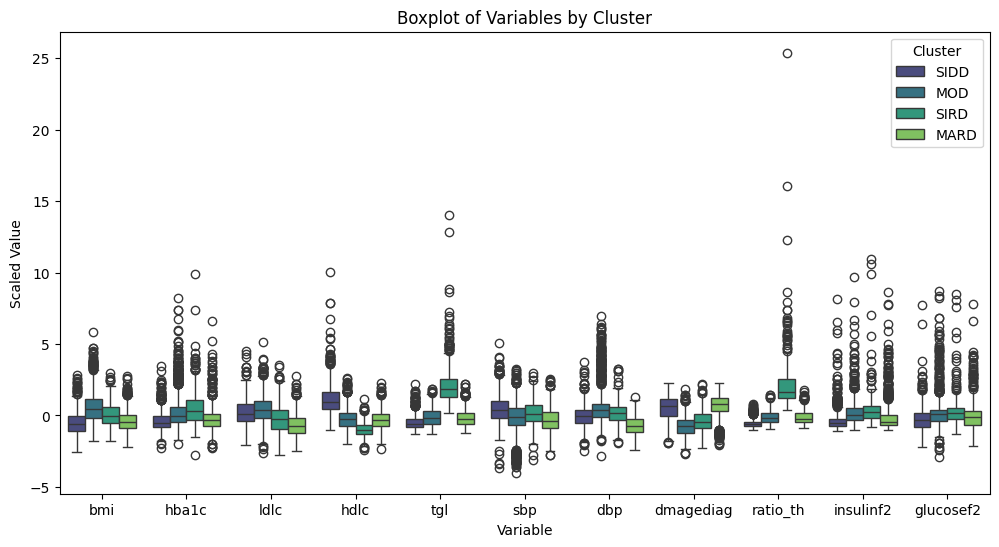

In [61]:
melted_data = pd.melt(scaled_data_df[var_selected2], id_vars=['cluster'], var_name='Variable', value_name='Value')

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data, x='Variable', y='Value', hue='cluster', palette='viridis')
plt.title('Boxplot of Variables by Cluster')
plt.xlabel('Variable')
plt.ylabel('Scaled Value')
plt.legend(title='Cluster', loc='upper right')
plt.show()

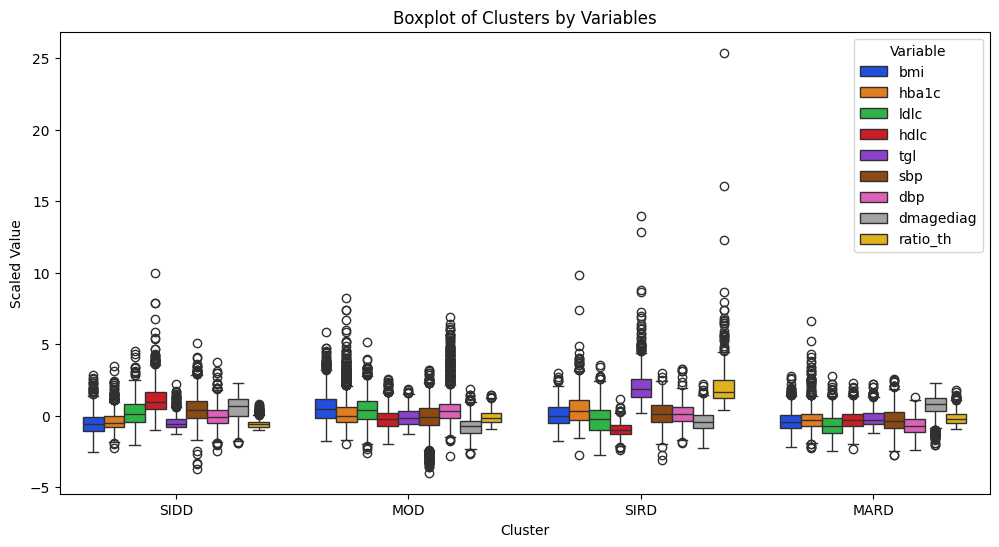

In [62]:
# use more distinct colors in the boxplot
melted_data2 = pd.melt(scaled_data_df[var_selected+['cluster']], id_vars=['cluster'], var_name='Variable', value_name='Value')
plt.figure(figsize=(12, 6))
sns.boxplot(data=melted_data2, x='cluster', y='Value', hue='Variable', palette='bright')
plt.title('Boxplot of Clusters by Variables')
plt.xlabel('Cluster')
plt.ylabel('Scaled Value')
plt.legend(title='Variable', loc='upper right')
plt.show()
# use more distinct colors in the boxplot



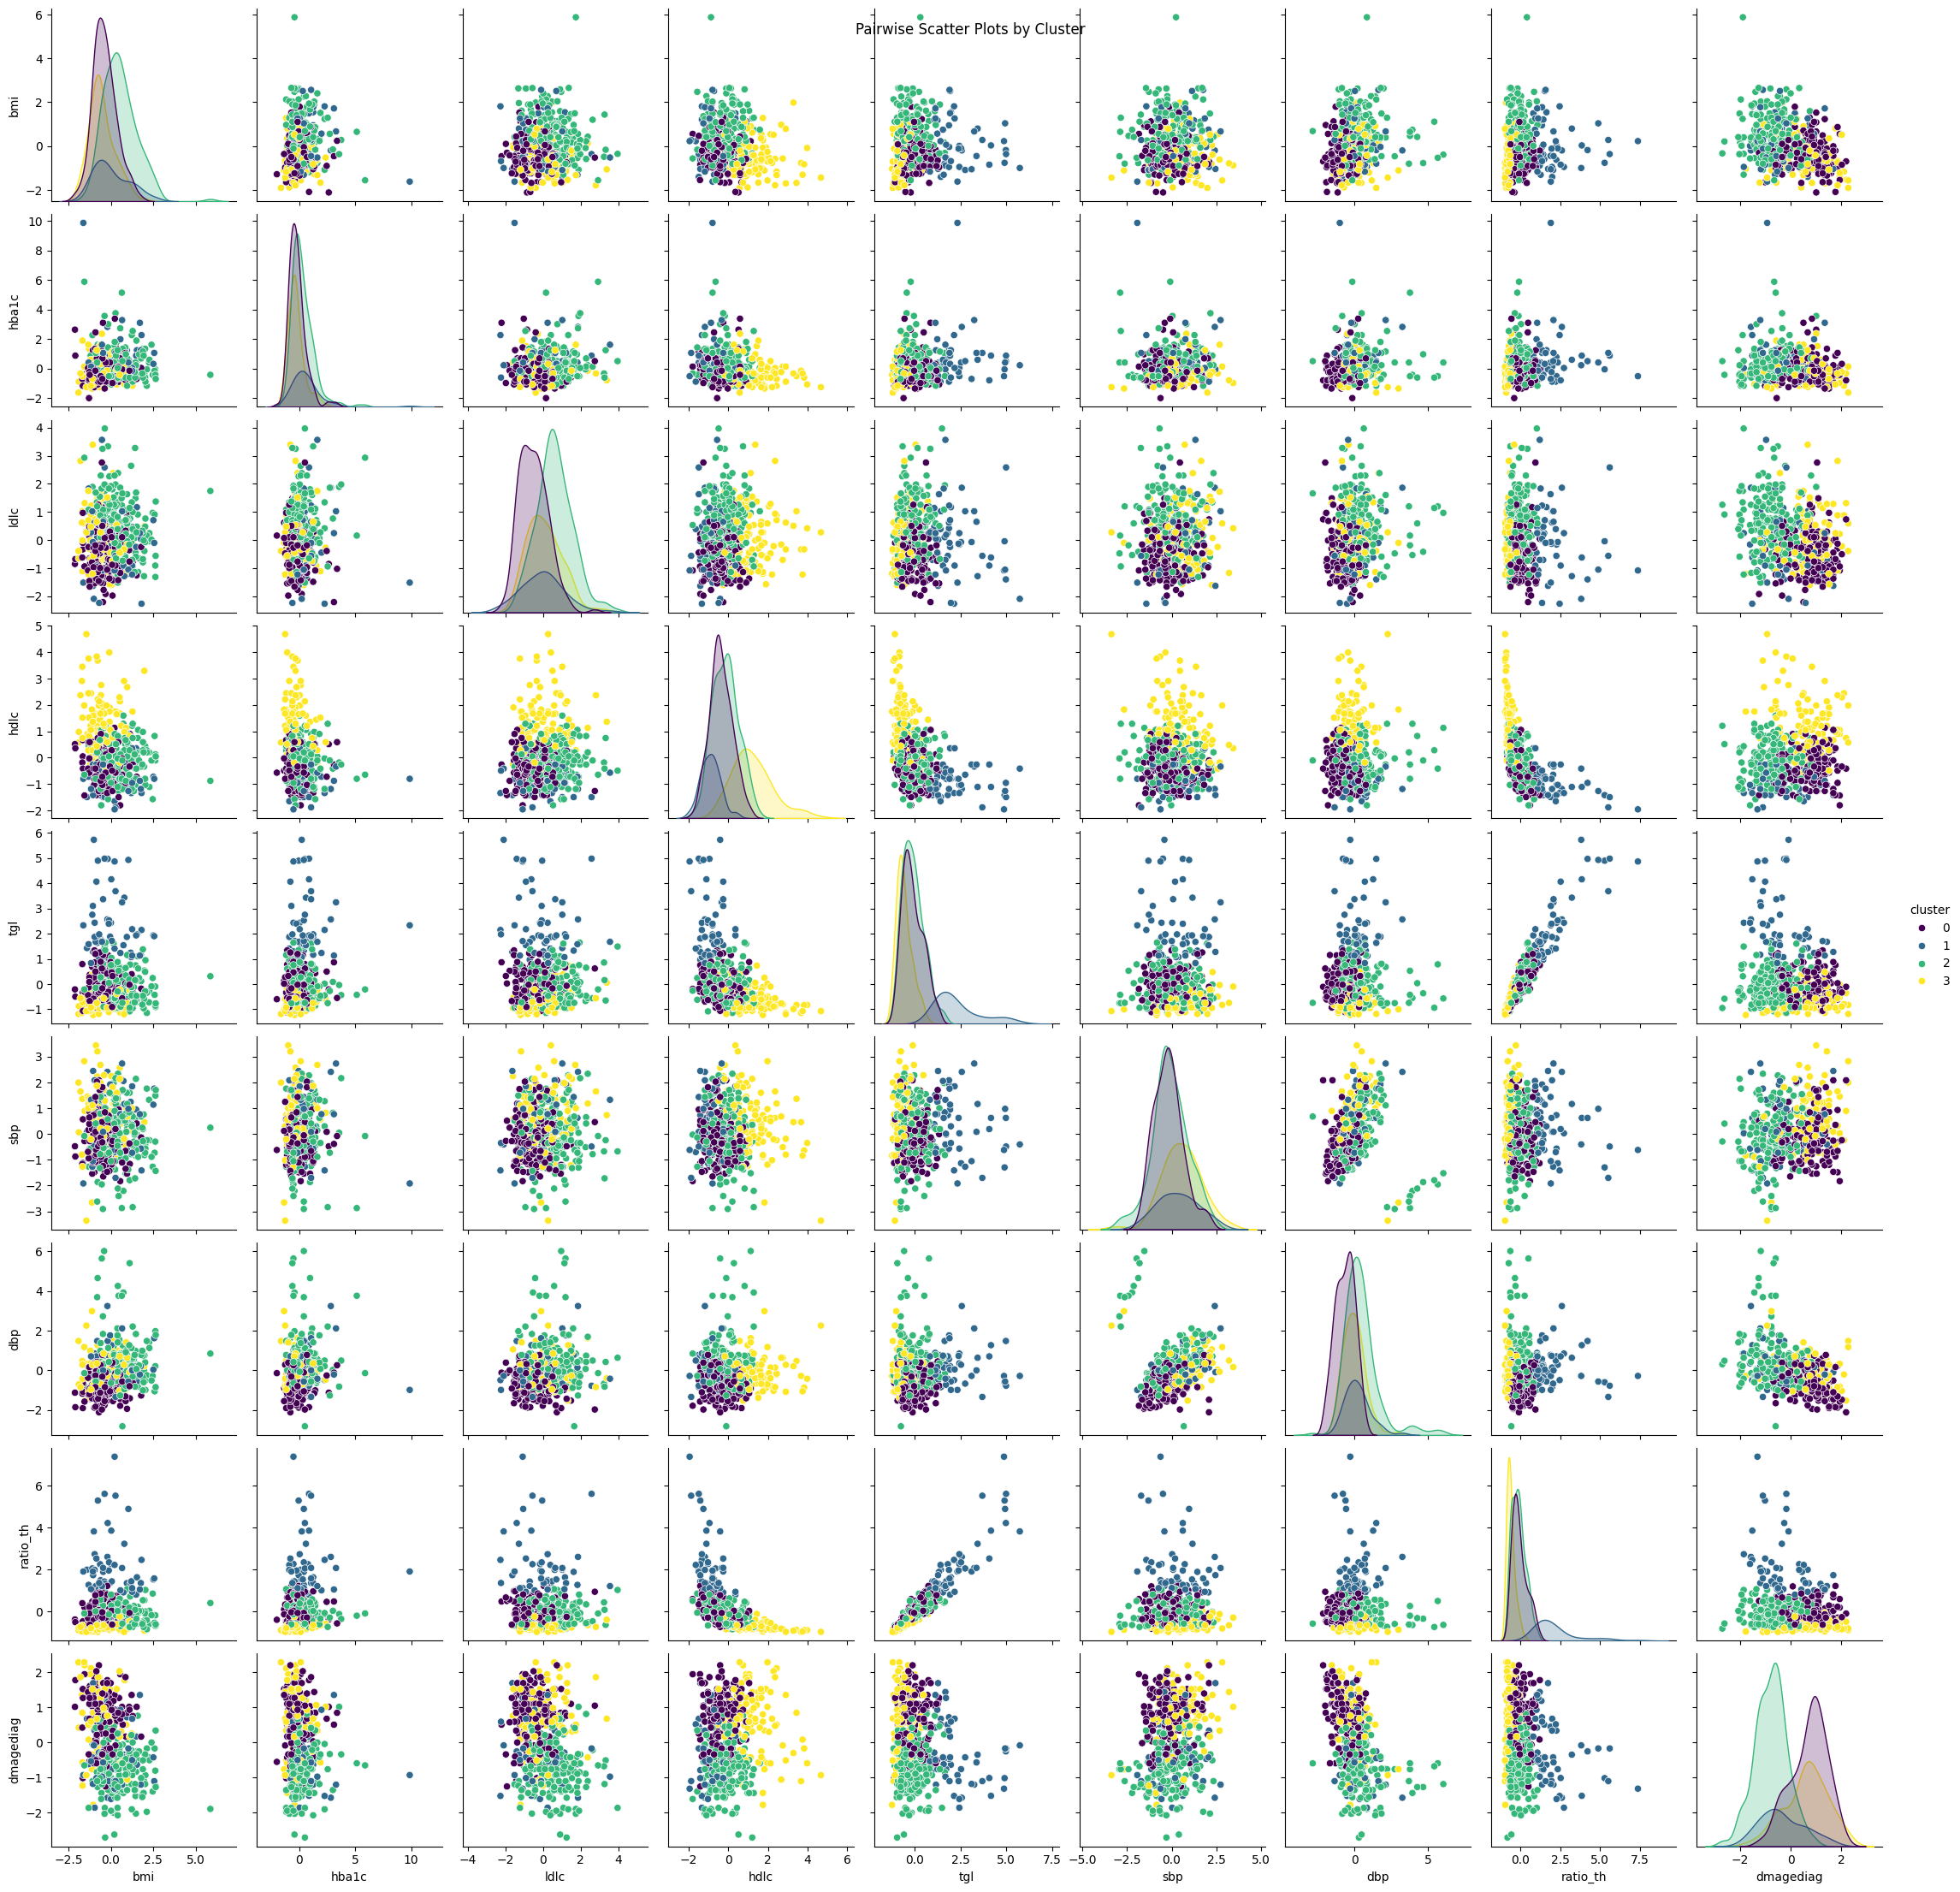

In [42]:
# Sampled to reduce overplotting and improve performance
sampled_df = scaled_data_df[var_selected2].sample(frac=0.1)  # Adjust frac as needed

sns.pairplot(sampled_df, vars=['bmi', 'hba1c', 'ldlc', 'hdlc', 'tgl', 'sbp', 'dbp', 'ratio_th', 'dmagediag'], hue='cluster', palette='viridis')
plt.suptitle('Pairwise Scatter Plots by Cluster')
plt.show()


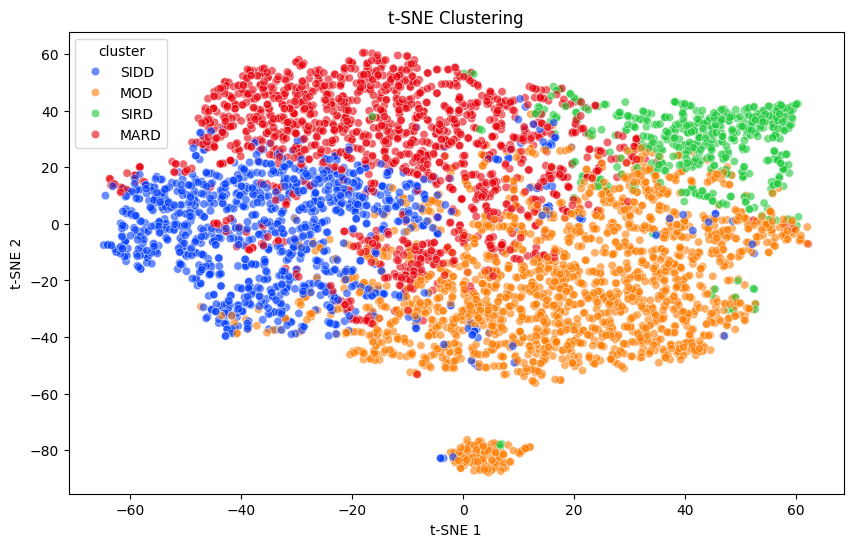

In [64]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_data_df[var_selected])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=scaled_data_df['cluster'], palette='bright', alpha=0.6)
plt.title('t-SNE Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


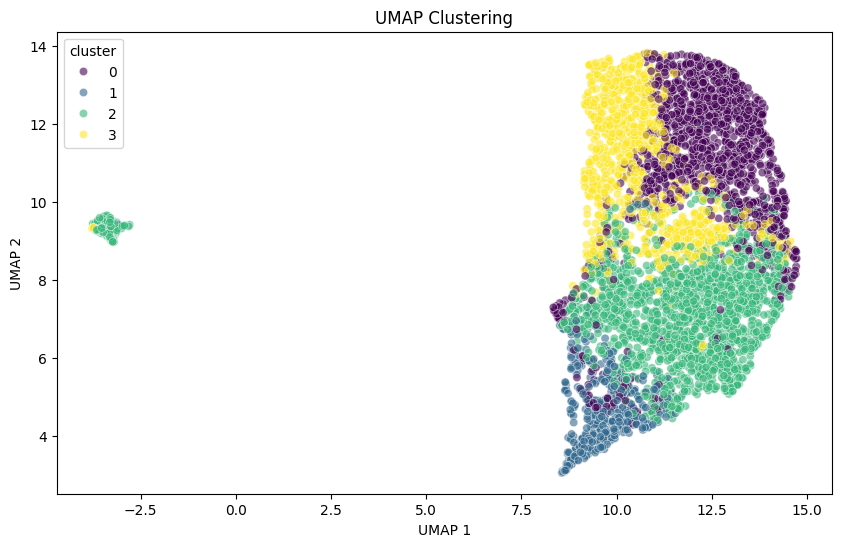

In [46]:
import umap.umap_ as umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data_df[var_selected])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=scaled_data_df['cluster'], palette='viridis', alpha=0.6)
plt.title('UMAP Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


In [27]:
# 2) The silhouette coefficient method
# Silhouette coefficient values range between -1 and 1. 
# Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

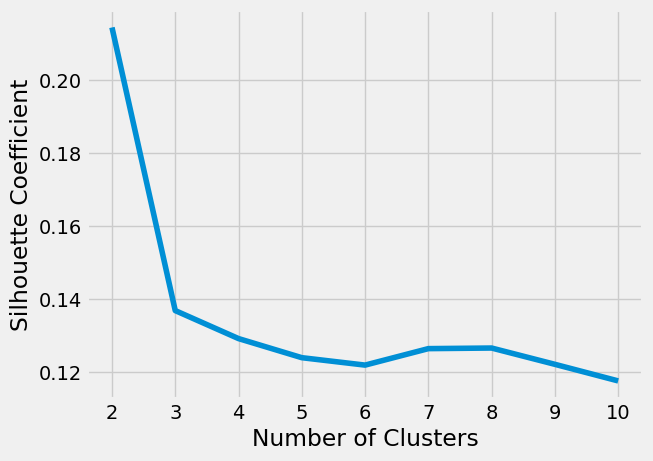

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

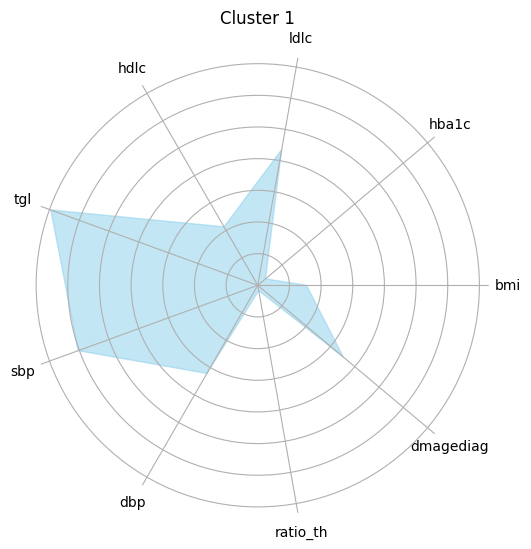

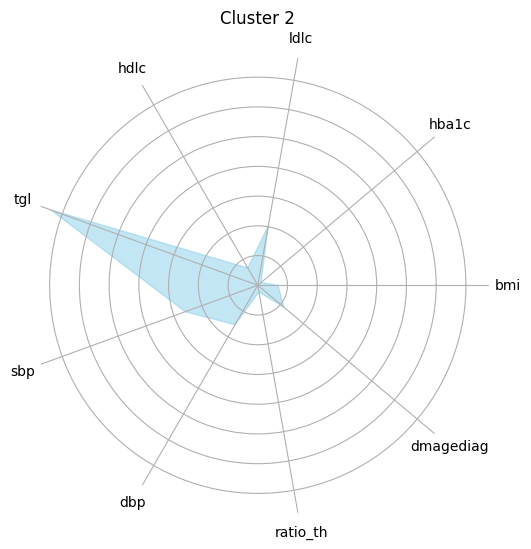

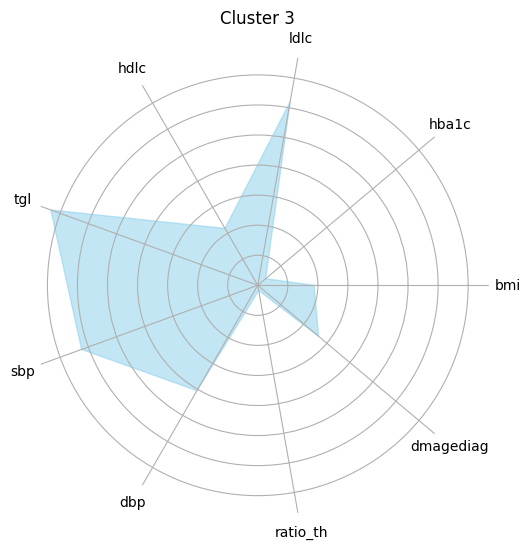

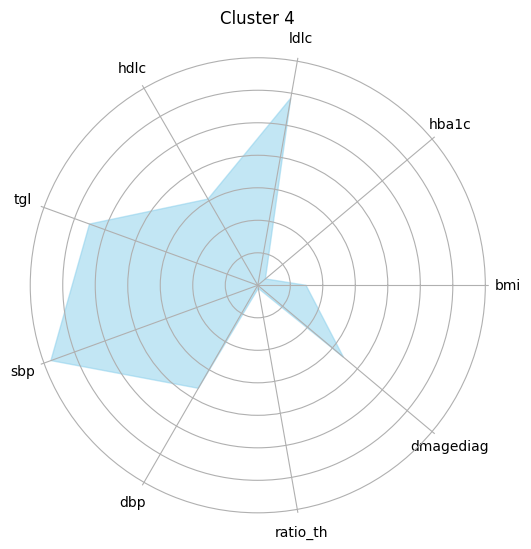

In [47]:
# create spider chart for the cluster
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# Define the variables and their mean values for each cluster
variables = ['bmi', 'hba1c', 'ldlc', 'hdlc', 'tgl', 'sbp', 'dbp', 'ratio_th', 'dmagediag']
mean_values = cluster_summary_or.loc[:, variables].values

# Define the number of clusters
num_clusters = 4

# Calculate the angles for each variable
angles = np.linspace(0, 2 * np.pi, len(variables), endpoint=False).tolist()
angles += angles[:1]

# Create a spider chart for each cluster
for cluster in range(num_clusters):
    # Get the mean values for the current cluster
    cluster_mean_values = mean_values[cluster]
    
    # Close the plot by repeating the first value
    values = cluster_mean_values.tolist()
    values += values[:1]
    
    # Create the spider chart
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
    ax.fill(angles, values, color='skyblue', alpha=0.5)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(variables)
    ax.set_yticklabels([])
    ax.set_title(f'Cluster {cluster+1}')
    ax.spines['polar'].set_visible(False)
    ax.grid(True)
    
    # Show the spider chart
    plt.show()

    


